In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('data_cooked.csv')
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,...,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,age
0,295850,1,1,584,2013,0,0.0,107,9,30,...,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0
1,216500,1,1,612,1965,0,1.0,105,15,6,...,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,41
2,279900,1,1,615,1963,0,0.0,183,13,31,...,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,49
3,379900,1,1,618,2000,33541,0.0,198,9,38,...,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,5
4,340000,1,1,634,1992,0,0.0,149,7,22,...,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,10


In [3]:
df = df.drop(columns=['insurance'])

**Random Forest**

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


In [5]:
train_X, test_X, train_y, test_y = train_test_split(df.drop('tx_price',1), df.tx_price, random_state=99,
                                                   test_size=0.3, )

In [6]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model = rf_model.fit(train_X, train_y)

In [7]:
y_optimum = rf_model.predict(test_X)
mean_absolute_error(test_y, y_optimum)

51109.98159292035



Tuning number of estimators via gridsearch:


In [8]:
def get_mae_rf(num_est, train_X, predictors_val, train_y, test_y):

    # fitting model with input max_leaf_nodes
    model = RandomForestRegressor(n_estimators=num_est, random_state=0)

    # fitting the model with training dataset
    model.fit(train_X, train_y)

    # making prediction with the test dataset
    preds_val = model.predict(test_X)

    # calculate and return the MAE
    mae = mean_absolute_error(test_y, preds_val)
    return(mae)

In [9]:
start = datetime.now()

plot_mae = []
estimator = range(2,100)

for num_est in range(2,100):
    my_mae = get_mae_rf(num_est,train_X,test_X,train_y,test_y)
    print("Number of estimators : %d \t\t Mean Absolute Error:  %d" %(num_est,my_mae))
    plot_mae.append(my_mae)

print ("Time taken = {} ms".format((datetime.now() - start).microseconds))


Number of estimators : 2 		 Mean Absolute Error:  61324
Number of estimators : 3 		 Mean Absolute Error:  56454
Number of estimators : 4 		 Mean Absolute Error:  54423
Number of estimators : 5 		 Mean Absolute Error:  53184
Number of estimators : 6 		 Mean Absolute Error:  52553
Number of estimators : 7 		 Mean Absolute Error:  52722
Number of estimators : 8 		 Mean Absolute Error:  52374
Number of estimators : 9 		 Mean Absolute Error:  52054
Number of estimators : 10 		 Mean Absolute Error:  51834
Number of estimators : 11 		 Mean Absolute Error:  52292
Number of estimators : 12 		 Mean Absolute Error:  52281
Number of estimators : 13 		 Mean Absolute Error:  51570
Number of estimators : 14 		 Mean Absolute Error:  51497
Number of estimators : 15 		 Mean Absolute Error:  51662
Number of estimators : 16 		 Mean Absolute Error:  51718
Number of estimators : 17 		 Mean Absolute Error:  51566
Number of estimators : 18 		 Mean Absolute Error:  51370
Number of estimators : 19 		 Mean Absol

In [10]:
start = datetime.now()

plot_mae = []
estimator = range(2,100)

for num_est in range(340,350):
    my_mae = get_mae_rf(num_est,train_X,test_X,train_y,test_y)
    print("num_est : %d \t\t Mean Absolute Error:  %d" %(num_est,my_mae))
    plot_mae.append(my_mae)

print ("Time taken = {} s".format((datetime.now() - start).seconds))



num_est : 340 		 Mean Absolute Error:  50695
num_est : 341 		 Mean Absolute Error:  50699
num_est : 342 		 Mean Absolute Error:  50704
num_est : 343 		 Mean Absolute Error:  50707
num_est : 344 		 Mean Absolute Error:  50712
num_est : 345 		 Mean Absolute Error:  50701
num_est : 346 		 Mean Absolute Error:  50718
num_est : 347 		 Mean Absolute Error:  50721
num_est : 348 		 Mean Absolute Error:  50741
num_est : 349 		 Mean Absolute Error:  50732
Time taken = 43 s


Even if we are increasing the number of estimators, it seems that it is not getting any better then the first trial.

At aounrd 350 round, it starts to get better results.

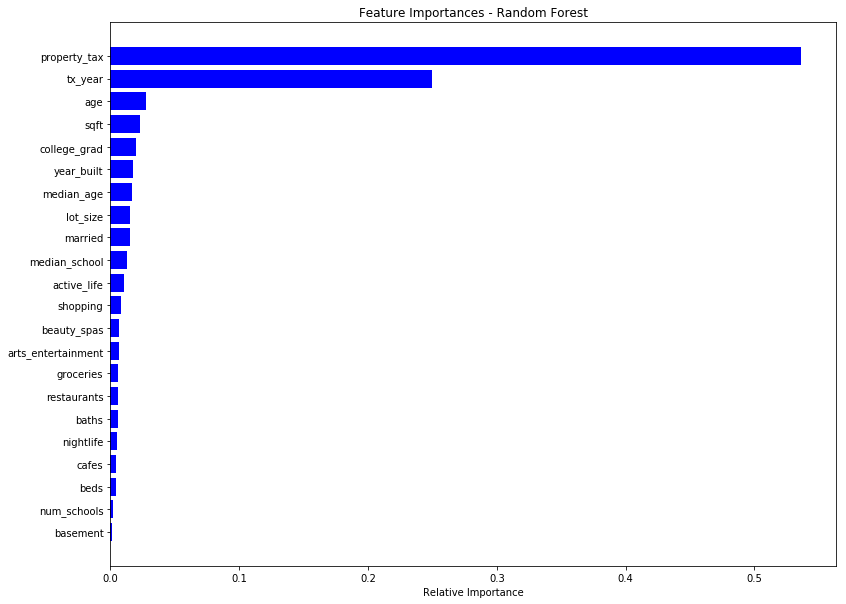

In [11]:
# %matplotlib inline
features = train_X.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)


plt.figure(figsize=(13,10))
plt.title('Feature Importances - Random Forest')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.savefig('FeatureImportance-RandomForest.png')
plt.show()


### Light GBM

In [12]:
import lightgbm as lgb

C:\Users\USER\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\USER\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [13]:
lgr = lgb.LGBMRegressor()
lgr.fit(train_X, train_y, eval_set=(test_X, test_y))


[1]	valid_0's l2: 2.08311e+10
[2]	valid_0's l2: 1.79562e+10
[3]	valid_0's l2: 1.5681e+10
[4]	valid_0's l2: 1.37485e+10
[5]	valid_0's l2: 1.21321e+10
[6]	valid_0's l2: 1.08704e+10
[7]	valid_0's l2: 9.76529e+09
[8]	valid_0's l2: 8.95937e+09
[9]	valid_0's l2: 8.24278e+09
[10]	valid_0's l2: 7.64986e+09
[11]	valid_0's l2: 7.17254e+09
[12]	valid_0's l2: 6.79275e+09
[13]	valid_0's l2: 6.46307e+09
[14]	valid_0's l2: 6.18124e+09
[15]	valid_0's l2: 5.93396e+09
[16]	valid_0's l2: 5.71355e+09
[17]	valid_0's l2: 5.5681e+09
[18]	valid_0's l2: 5.41947e+09
[19]	valid_0's l2: 5.33162e+09
[20]	valid_0's l2: 5.20561e+09
[21]	valid_0's l2: 5.10816e+09
[22]	valid_0's l2: 5.01241e+09
[23]	valid_0's l2: 4.96633e+09
[24]	valid_0's l2: 4.91433e+09
[25]	valid_0's l2: 4.88163e+09
[26]	valid_0's l2: 4.84754e+09
[27]	valid_0's l2: 4.83395e+09
[28]	valid_0's l2: 4.80827e+09
[29]	valid_0's l2: 4.75577e+09
[30]	valid_0's l2: 4.71809e+09
[31]	valid_0's l2: 4.69e+09
[32]	valid_0's l2: 4.68609e+09
[33]	valid_0's l2: 4.6

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [14]:
y_optimum_lgr = lgr.predict(test_X)
mean_absolute_error(test_y, y_optimum_lgr)

49864.64752943325

The MAE is too high. So we need to tune the model by changing no of estimators.

In [15]:
lgr = lgb.LGBMRegressor(n_estimators=10000)
lgr.fit(train_X, train_y, eval_set=(test_X, test_y), verbose=False)


C:\Users\USER\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=10000, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [16]:


y_optimum_lgr = lgr.predict(test_X)
mean_absolute_error(test_y, y_optimum_lgr)



49917.75191175215

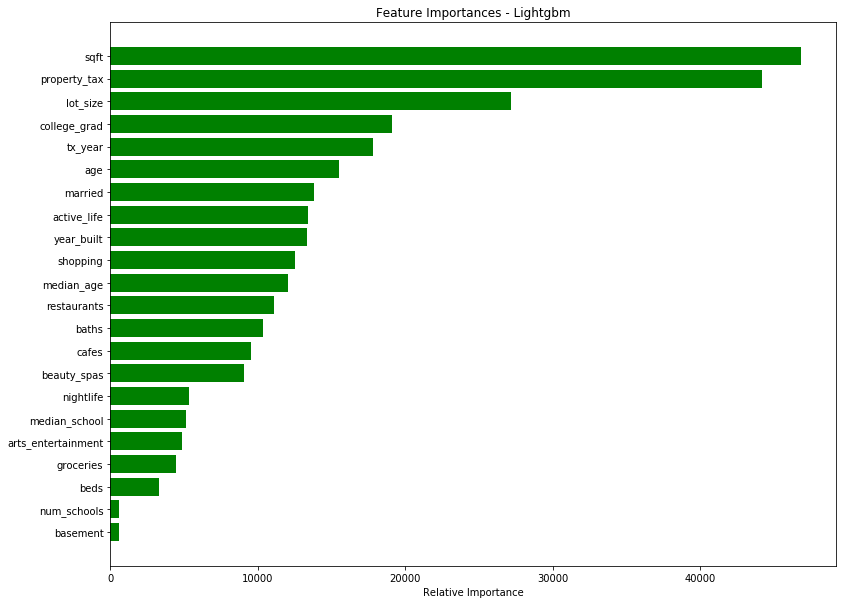

In [17]:

plt.figure(figsize=(13,10))
for y,x in sorted(zip(lgr.feature_importances_, train_X.columns), reverse=False):
    plt.barh(x,y, color='g')
    plt.title('Feature Importances - Lightgbm')
    plt.xlabel('Relative Importance')
    plt.savefig('FeatureImportance-LightGBM.png')